# Building the decision tree using the default hyperparameters

In [27]:
#Read our Test and Train samples
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import os

In [58]:
directory_path = 'Dataset/Split_Samples/Cluster/Real/3/'

# Read the CSV files
X_train = pd.read_csv(os.path.join(directory_path, "X_Train.csv"), header=0, delimiter=',')
X_test = pd.read_csv(os.path.join(directory_path, "X_Test.csv"), header=0, delimiter=',')
y_train = pd.read_csv(os.path.join(directory_path, "Y_Train.csv"), header=0, delimiter=',')
y_test = pd.read_csv(os.path.join(directory_path, "Y_Test.csv"), header=0, delimiter=',')

# Create the regressor with default parameters
regressor = DecisionTreeRegressor(random_state=80)

# Train the model on the training data
regressor.fit(X_train, y_train)

# Predict using the trained model on the test data
y_pred = regressor.predict(X_test)

# Evaluating the Random forest tree (the default hyperparameters)- Overfitting detected

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

import numpy as np
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Overfitting spotted Train- accuracy of 1 indicates overfitted model
print (f'Train Accuracy - : {regressor.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {regressor.score(X_test,y_test):.3f}')

Mean Squared Error: 15054183849.115797
Mean Absolute Error: 90664.97054886211
R-squared: 0.4315048261826907
Root Mean Squared Error: 122695.49237488637
Train Accuracy - : 1.000
Test Accuracy - : 0.432


# Checking feature importance of decision tree (with default hyperparameters)

In [60]:
# Get the feature importance scores
feature_importance = regressor.feature_importances_

# Create a DataFrame to display the results
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort the DataFrame in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


            Feature  Importance
13   WiderBarDepriv    0.284328
3      EduSklDepriv    0.143042
4      HealthDepriv    0.122040
14     IndoorDepriv    0.114486
15    OutdoorDepriv    0.099704
11   AdultSklDepriv    0.065676
12     GeoBarDepriv    0.023654
6    HousServDepriv    0.023504
10    ChildYPDepriv    0.019409
7      LivEnvDepriv    0.019368
8    ChildIncDepriv    0.018609
5         CrimScore    0.015145
0          IMDScore    0.015072
9   OldPplIncDepriv    0.012462
2         EmpDepriv    0.012171
1         IncDepriv    0.011331
16          Cluster    0.000000


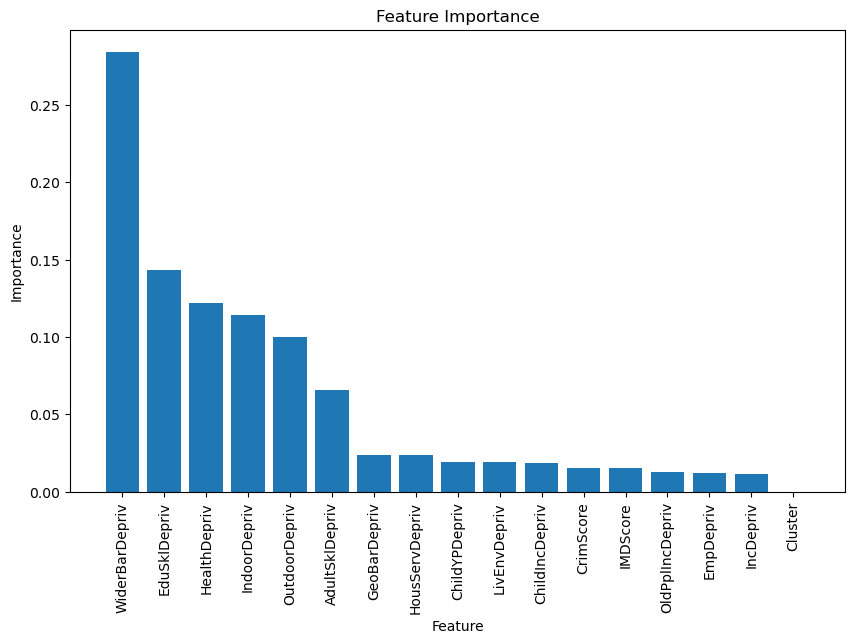

In [61]:
import matplotlib.pyplot as plt

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


# Building the decision tree (hyperparameter tuned)

In [62]:
# Hyperparameter tuning using randomizedSearchCv
from sklearn.model_selection import RandomizedSearchCV

#Hyper parameters to be randomly tested
parameters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('squared_error', 'friedman_mse','absolute_error','poisson')
              , 'max_features' : ('sqrt', 'log2')
              , 'min_samples_split' : (40,41,42,43,44,45,46,47,48,4950,52,54,56,58)
              ,'splitter' : ('best', 'random')
              ,'min_samples_leaf' : (1,2,4,5,6,7,8,9,10)
              ,'max_leaf_nodes' : (150,151,152,153,154,155,156,157,158,159,160)
              ,'min_impurity_decrease' : (10,15,16,18,20,25)
              ,'ccp_alpha' : (0,1,2,4,5,6,7,8,9,10)
             }

from sklearn.tree import DecisionTreeRegressor
#we still maintain a random state of 42.
DT_grid  = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), param_distributions = parameters, cv = 5, verbose = True)
#Fitting the raandom hyperparameters into  RandomizedSearchCV class
DT_grid.fit(X_train,y_train)




Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   param_distributions={'ccp_alpha': (0, 1, 2, 4, 5, 6, 7, 8, 9,
                                                      10),
                                        'criterion': ('squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'),
                                        'max_depth': (3, 5, 7, 9, 10, 15, 20,
                                                      25),
                                        'max_features': ('sqrt', 'log2'),
                                        'max_leaf_nodes': (150, 151, 152, 153,
                                                           154, 155, 156, 157,
                                                           158, 159, 160),
                                        'min_impurity_decrease': (10, 15, 16,
                                                                  18, 20, 25),
                                        'min_samples_leaf': (1, 2, 4, 5, 6, 7,
                                                             8, 9, 10),
                                        'min_samples_split': (40, 41, 42, 43,
                                                              44, 45, 46, 47,
                                                              48, 4950, 52, 54,
                                                              56, 58),
                                        'splitter': ('best', 'random')},
                   verbose=True)

In [63]:
#Now checking the best estimator
best_estimator = DT_grid.best_estimator_
#Now checking the best accuracy score
best_accuracy = DT_grid.best_score_

print(best_estimator)
print(best_accuracy)

DecisionTreeRegressor(ccp_alpha=9, criterion='poisson', max_depth=10,
                      max_features='log2', max_leaf_nodes=151,
                      min_impurity_decrease=10, min_samples_leaf=6,
                      min_samples_split=44, random_state=42)
0.5541212746697293


# Building Best decision tree models (hyperparameter tuned)

In [64]:
#Model 1
regressor1 = DecisionTreeRegressor(ccp_alpha=5, criterion='absolute_error', max_depth=15,
                      max_features='log2', max_leaf_nodes=150,
                      min_impurity_decrease=15, min_samples_leaf=8,
                      min_samples_split=56, random_state=42)

regressor1.fit(X_train, y_train)


models = [regressor1]

# Now lets look at the accuracy for each decision tree model

In [65]:
modelNumber = 1
for model in models:
    print("For model "+str(modelNumber))
    print (f'Train Accuracy - : {model.score(X_train,y_train):.3f}')
    print (f'Test Accuracy - : {model.score(X_test,y_test):.3f}')
    print("----------------------------------------")
    modelNumber += 1

For model 1
Train Accuracy - : 0.693
Test Accuracy - : 0.552
----------------------------------------


# Now lets look at the MSE & R-Squared Value for each decision tree model

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

modelNumber = 1
for model in models:
    print("For model "+str(modelNumber))
    # Predict using the trained model 2 on the test data
    y_pred = model.predict(X_test)
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    import numpy as np
    rmse = np.sqrt(mse)
    print("Root Mean Squared Error:", rmse)
    print("----------------------------------------")
    modelNumber += 1

For model 1
Mean Squared Error: 11857828800.977076
R-squared: 0.5522096373425587
Root Mean Squared Error: 108893.65822203364
----------------------------------------


# The feature importance score and visualization for model 1

            Feature  Importance
4      HealthDepriv    0.496582
13   WiderBarDepriv    0.144814
14     IndoorDepriv    0.055014
6    HousServDepriv    0.050444
11   AdultSklDepriv    0.039383
12     GeoBarDepriv    0.039081
15    OutdoorDepriv    0.032924
10    ChildYPDepriv    0.031848
5         CrimScore    0.026662
9   OldPplIncDepriv    0.019124
7      LivEnvDepriv    0.017892
3      EduSklDepriv    0.013228
0          IMDScore    0.012770
2         EmpDepriv    0.010008
8    ChildIncDepriv    0.006177
1         IncDepriv    0.004049
16          Cluster    0.000000


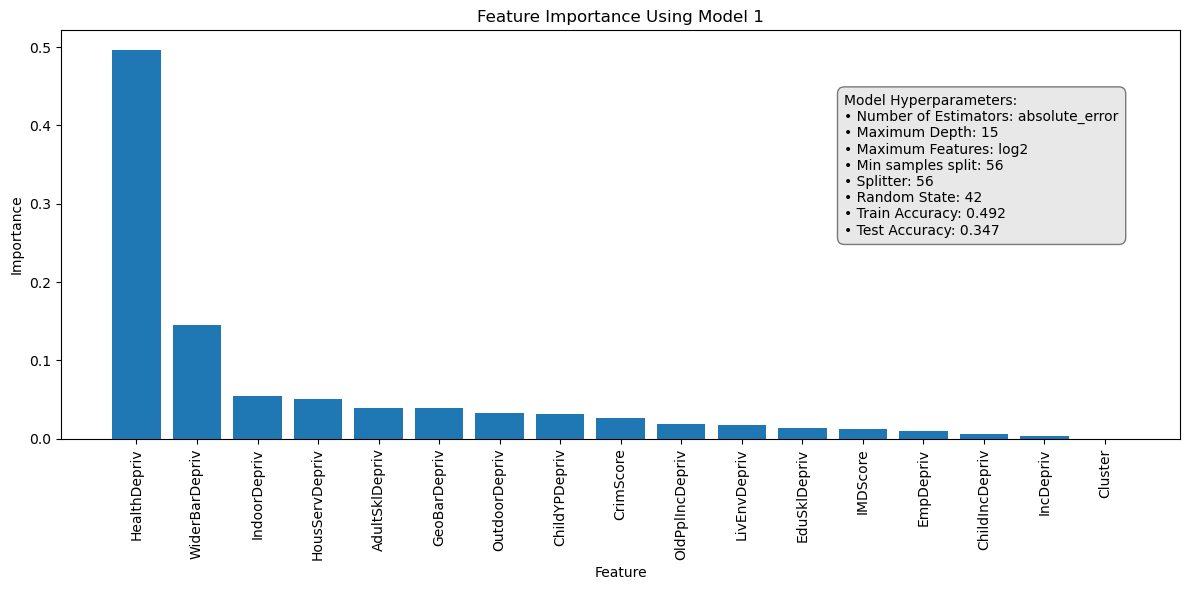

In [57]:
# Get the feature importance scores for model 1
modelIndex = 0
feature_importance = models[modelIndex].feature_importances_

# Create a DataFrame to display the results
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort the DataFrame in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Placeholder for model hyperparameters used
model_hyperparameters = {
    'criterion': models[modelIndex].criterion,
    'max_depth': models[modelIndex].max_depth,
    'max_features': models[modelIndex].max_features,
    'min_samples_split': models[modelIndex].min_samples_split,
    'splitter': models[modelIndex].min_samples_split,
    'random_state': models[modelIndex].random_state,
    'train_accuracy' : round(models[modelIndex].score(X_train,y_train),3),
    'test_accuracy': round(models[modelIndex].score(X_test,y_test),3)
    # Add more hyperparameters if needed
}


# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Using Model '+str(modelIndex+1))
plt.xticks(rotation=90)

# Adding bullet points for model hyperparameters on the right side of the plot
bullet_points = [
    f"Model Hyperparameters:",
    f"• Number of Estimators: {model_hyperparameters['criterion']}",
    f"• Maximum Depth: {model_hyperparameters['max_depth']}",
    f"• Maximum Features: {model_hyperparameters['max_features']}",
    f"• Min samples split: {model_hyperparameters['min_samples_split']}",
    f"• Splitter: {model_hyperparameters['splitter']}",
    f"• Random State: {model_hyperparameters['random_state']}",
    f"• Train Accuracy: {model_hyperparameters['train_accuracy']}",
    f"• Test Accuracy: {model_hyperparameters['test_accuracy']}",
    
    # Add more hyperparameters if needed
]


# Display the bullet points
plt.text(0.7, 0.5, "\n".join(bullet_points), transform=plt.gca().transAxes,
         bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()


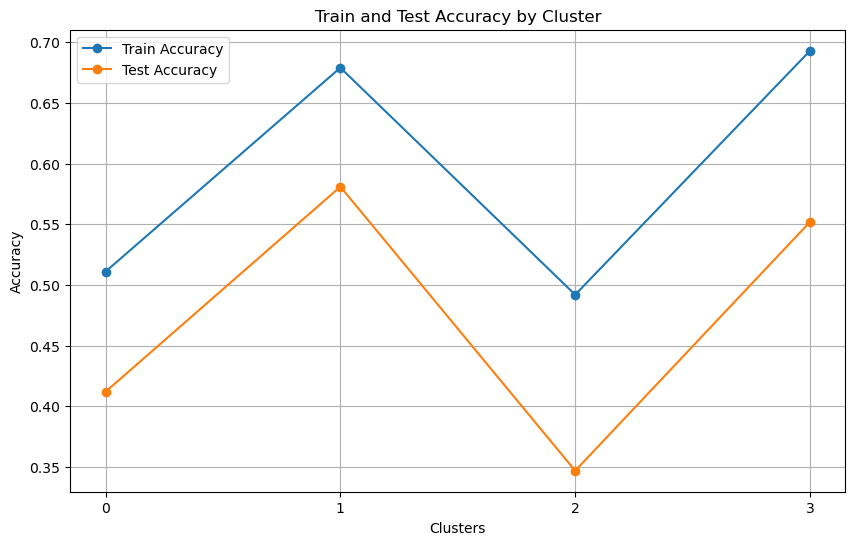

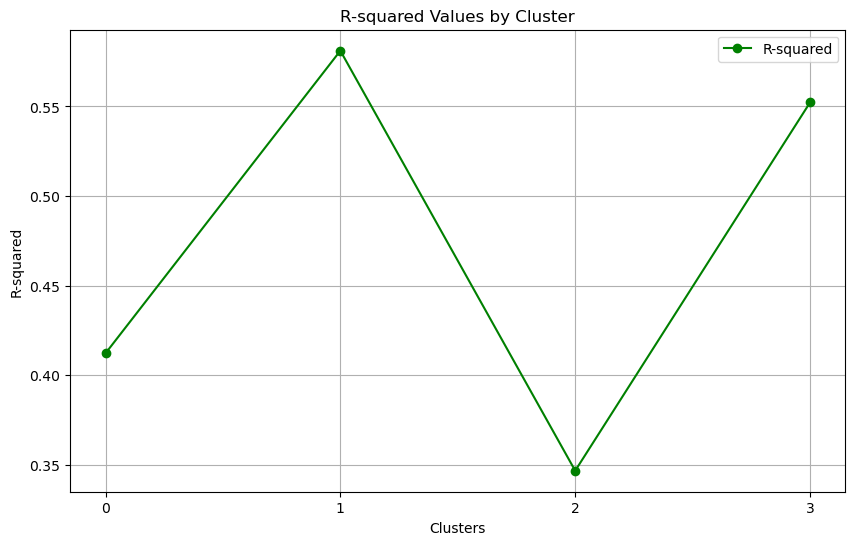

In [73]:
import matplotlib.pyplot as plt

# Data for clusters
clusters = [0, 1, 2, 3]

# Train and test scores for each cluster
train_accuracy = [0.511, 0.679, 0.492, 0.693]
test_accuracy = [0.412, 0.581, 0.347, 0.552]
r_squared = [0.4122693642353963, 0.581069976333934, 0.34677184152530705, 0.5522096373425587]

# Create the line graph for Train and Test Accuracy
plt.figure(figsize=(10, 6))
plt.plot(clusters, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(clusters, test_accuracy, marker='o', label='Test Accuracy')

# Add labels and a legend
plt.xlabel('Clusters')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy by Cluster')
plt.legend()

# Customize the x-axis ticks to show cluster numbers
plt.xticks(clusters)

# Show the graph
plt.grid(True)
plt.show()

# Create a separate line graph for R-squared values
plt.figure(figsize=(10, 6))
plt.plot(clusters, r_squared, marker='o', color='green', label='R-squared')

# Add labels and a legend
plt.xlabel('Clusters')
plt.ylabel('R-squared')
plt.title('R-squared Values by Cluster')
plt.legend()

# Customize the x-axis ticks to show cluster numbers
plt.xticks(clusters)

# Show the graph
plt.grid(True)
plt.show()


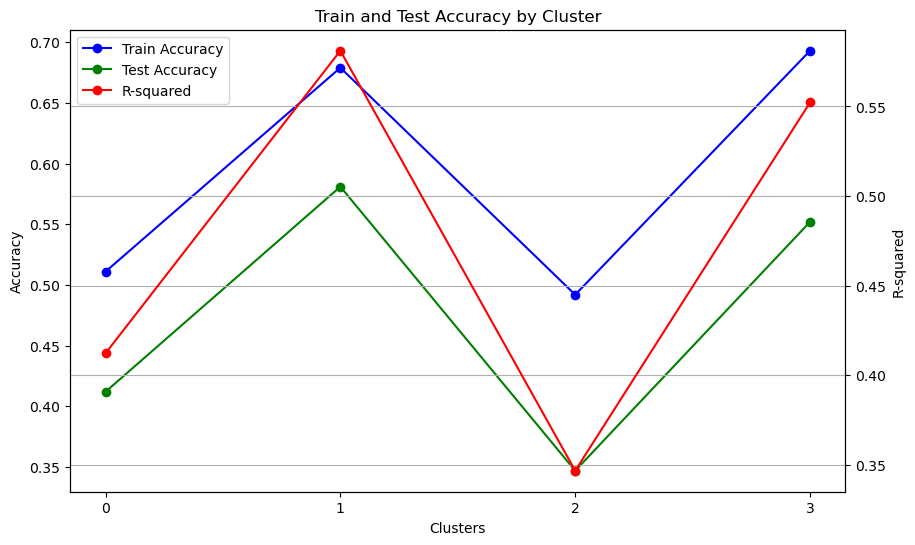

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Data for clusters
clusters = [0, 1, 2, 3]

# Train and test scores for each cluster
train_accuracy = [0.511, 0.679, 0.492, 0.693]
test_accuracy = [0.412, 0.581, 0.347, 0.552]
r_squared = [0.4122693642353963, 0.581069976333934, 0.34677184152530705, 0.5522096373425587]

# Create the figure and first axis for accuracy
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Train Accuracy
ax1.plot(clusters, train_accuracy, marker='o', label='Train Accuracy', color='b')
# Plot Test Accuracy
ax1.plot(clusters, test_accuracy, marker='o', label='Test Accuracy', color='g')

# Set labels and title for the first axis
ax1.set_xlabel('Clusters')
ax1.set_ylabel('Accuracy')
ax1.set_title('Train and Test Accuracy by Cluster')

# Create a second axis for R-squared
ax2 = ax1.twinx()  # Share the same x-axis

# Plot R-squared on the second axis
ax2.plot(clusters, r_squared, marker='o', label='R-squared', color='r')

# Set labels for the second axis
ax2.set_ylabel('R-squared')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# Customize the x-axis ticks to show cluster numbers
ax1.set_xticks(clusters)

# Show the graph
plt.grid(True)
plt.show()


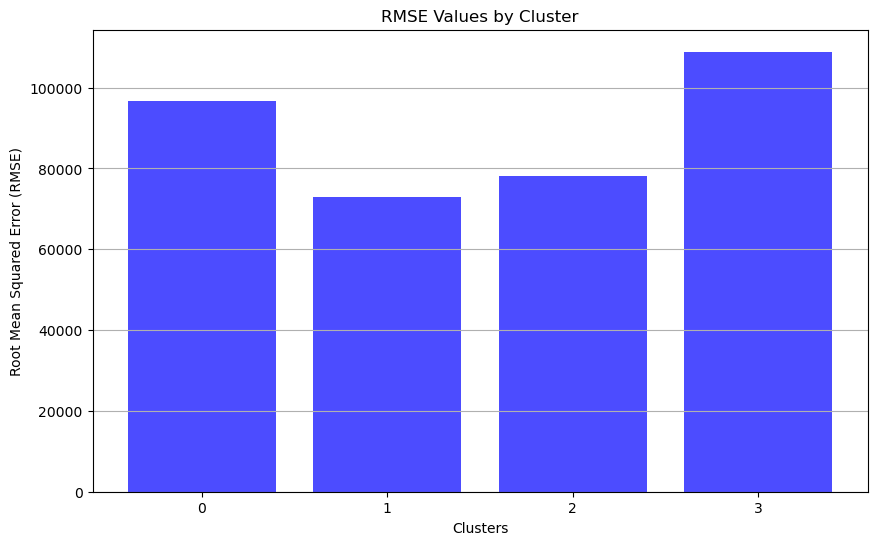

In [75]:
import matplotlib.pyplot as plt

# Data for clusters
clusters = [0, 1, 2, 3]

# RMSE values for each cluster
rmse_values = [96790.84631657043, 72963.6015795368, 78145.88679085899, 108893.65822203364]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(clusters, rmse_values, color='blue', alpha=0.7)

# Add labels and a title
plt.xlabel('Clusters')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE Values by Cluster')

# Customize the x-axis ticks to show cluster numbers
plt.xticks(clusters)

# Show the graph
plt.grid(axis='y')
plt.show()
